In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
input_data = 'unum/final_result.json'
with open(input_data) as f:
    unum_data = json.loads(f.read())

In [3]:
input_data = 'step-functions/final_result.json'
with open(input_data) as f:
    sf_data = json.loads(f.read())

First focus on 1KB payload

In [23]:
aggregate={
    "sf 1kb 50p": [],
    "sf 1kb 99p": [],
    "unum 1kb 50p": [],
    "unum 1kb 99p": [],
    "sf 5kb 50p": [],
    "sf 5kb 99p": [],
    "unum 5kb 50p": [],
    "unum 5kb 99p": [],
    "sf 50kb 50p": [],
    "sf 50kb 99p": [],
    "unum 50kb 50p": [],
    "unum 50kb 99p": [],
}

In [24]:
for d in unum_data:
    
    unum_1kb = np.array(unum_data[d]['1'])
    sf_1kb = np.array(sf_data[d]['1'])
    
    aggregate['sf 1kb 50p'].append(np.percentile(sf_1kb, 50))
    aggregate['sf 1kb 99p'].append(np.percentile(sf_1kb, 99))
    aggregate['unum 1kb 50p'].append(np.percentile(unum_1kb, 50))
    aggregate['unum 1kb 99p'].append(np.percentile(unum_1kb, 99))
    
    unum_5kb = np.array(unum_data[d]['5'])
    sf_5kb = np.array(sf_data[d]['5'])
    
    aggregate['sf 5kb 50p'].append(np.percentile(sf_5kb, 50))
    aggregate['sf 5kb 99p'].append(np.percentile(sf_5kb, 99))
    aggregate['unum 5kb 50p'].append(np.percentile(unum_5kb, 50))
    aggregate['unum 5kb 99p'].append(np.percentile(unum_5kb, 99))
    
    unum_50kb = np.array(unum_data[d]['50'])
    sf_50kb = np.array(sf_data[d]['50'])
    
    aggregate['sf 50kb 50p'].append(np.percentile(sf_50kb, 50))
    aggregate['sf 50kb 99p'].append(np.percentile(sf_50kb, 99))
    aggregate['unum 50kb 50p'].append(np.percentile(unum_50kb, 50))
    aggregate['unum 50kb 99p'].append(np.percentile(unum_50kb, 99))

In [25]:
aggregate

{'sf 1kb 50p': [202.5,
  304.0,
  432.5,
  560.0,
  653.5,
  766.5,
  927.5,
  1002.5,
  1083.0],
 'sf 1kb 99p': [271.58,
  442.78999999999996,
  603.3599999999999,
  734.96,
  909.1799999999998,
  938.74,
  1140.57,
  1252.0899999999997,
  1838.4099999999994],
 'unum 1kb 50p': [158.0,
  260.5,
  365.0,
  456.5,
  552.0,
  650.0,
  767.0,
  829.5,
  969.5],
 'unum 1kb 99p': [326.8299999999999,
  327.81999999999994,
  410.53,
  524.67,
  617.3399999999999,
  775.16,
  890.03,
  1187.4599999999998,
  1365.5699999999995],
 'sf 5kb 50p': [218.0,
  337.5,
  414.0,
  551.0,
  717.0,
  785.0,
  893.0,
  1023.5,
  1198.0],
 'sf 5kb 99p': [447.90999999999997,
  482.7799999999999,
  692.9799999999998,
  709.64,
  1024.2299999999998,
  1001.7399999999999,
  1087.62,
  1863.639999999999,
  2045.6299999999999],
 'unum 5kb 50p': [161.5,
  262.0,
  379.0,
  486.0,
  589.0,
  669.5,
  784.5,
  889.0,
  1010.5],
 'unum 5kb 99p': [254.59999999999994,
  318.82,
  587.3199999999999,
  679.1499999999999,
 

[2, 3, 4, 5, 6, 7, 8, 9, 10]
[202.5, 304.0, 432.5, 560.0, 653.5, 766.5, 927.5, 1002.5, 1083.0]


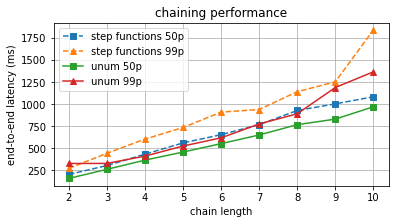

In [21]:
depth = [int(d[5:]) for d in list(unum_data.keys())]
fig, ax1 = plt.subplots(figsize=(6,3))

print(depth)
print(aggregate['sf 1kb 50p'])

ax1.plot(depth, aggregate['sf 1kb 50p'], marker='s', ls = '--', label='step functions 50p')
ax1.plot(depth, aggregate['sf 1kb 99p'], marker='^', ls = '--',  label='step functions 99p')

ax1.plot(depth, aggregate['unum 1kb 50p'], marker='s', label='unum 50p')
ax1.plot(depth, aggregate['unum 1kb 99p'], marker='^', label='unum 99p')

ax1.set_title('chaining performance')
ax1.set(xlabel='chain length',ylabel='end-to-end latency (ms)')
ax1.legend()
ax1.grid()

        
fig.savefig('ChainMicroLatency.pdf', format='pdf')

[2, 3, 4, 5, 6, 7, 8, 9, 10]
[202.5, 304.0, 432.5, 560.0, 653.5, 766.5, 927.5, 1002.5, 1083.0]


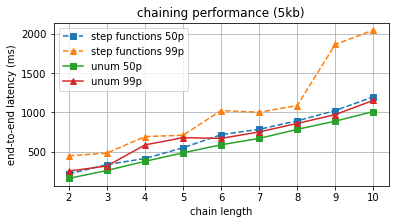

In [26]:
depth = [int(d[5:]) for d in list(unum_data.keys())]
fig, ax1 = plt.subplots(figsize=(6,3))

print(depth)
print(aggregate['sf 1kb 50p'])

ax1.plot(depth, aggregate['sf 5kb 50p'], marker='s', ls = '--', label='step functions 50p')
ax1.plot(depth, aggregate['sf 5kb 99p'], marker='^', ls = '--',  label='step functions 99p')

ax1.plot(depth, aggregate['unum 5kb 50p'], marker='s', label='unum 50p')
ax1.plot(depth, aggregate['unum 5kb 99p'], marker='^', label='unum 99p')

ax1.set_title('chaining performance (5kb)')
ax1.set(xlabel='chain length',ylabel='end-to-end latency (ms)')
ax1.legend()
ax1.grid()

        
# fig.savefig('ChainMicroLatency.pdf', format='pdf')

[2, 3, 4, 5, 6, 7, 8, 9, 10]
[202.5, 304.0, 432.5, 560.0, 653.5, 766.5, 927.5, 1002.5, 1083.0]


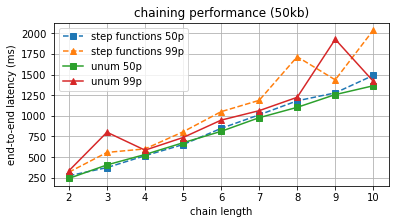

In [27]:
depth = [int(d[5:]) for d in list(unum_data.keys())]
fig, ax1 = plt.subplots(figsize=(6,3))

print(depth)
print(aggregate['sf 1kb 50p'])

ax1.plot(depth, aggregate['sf 50kb 50p'], marker='s', ls = '--', label='step functions 50p')
ax1.plot(depth, aggregate['sf 50kb 99p'], marker='^', ls = '--',  label='step functions 99p')

ax1.plot(depth, aggregate['unum 50kb 50p'], marker='s', label='unum 50p')
ax1.plot(depth, aggregate['unum 50kb 99p'], marker='^', label='unum 99p')

ax1.set_title('chaining performance (50kb)')
ax1.set(xlabel='chain length',ylabel='end-to-end latency (ms)')
ax1.legend()
ax1.grid()

        
# fig.savefig('ChainMicroLatency.pdf', format='pdf')

[2, 3, 4, 5, 6, 7, 8, 9, 10]
[202.5, 304.0, 432.5, 560.0, 653.5, 766.5, 927.5, 1002.5, 1083.0]


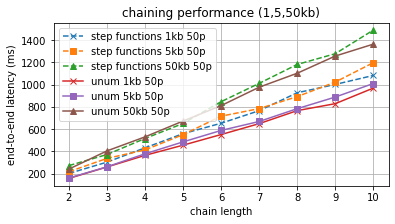

In [31]:
depth = [int(d[5:]) for d in list(unum_data.keys())]
fig, ax1 = plt.subplots(figsize=(6,3))

print(depth)
print(aggregate['sf 1kb 50p'])

ax1.plot(depth, aggregate['sf 1kb 50p'], ls = '--', marker = "x", label='step functions 1kb 50p')
ax1.plot(depth, aggregate['sf 5kb 50p'], ls = '--',  marker = "s",label='step functions 5kb 50p')
ax1.plot(depth, aggregate['sf 50kb 50p'], ls = '--',  marker = "^",label='step functions 50kb 50p')

ax1.plot(depth, aggregate['unum 1kb 50p'], marker = "x", label='unum 1kb 50p')
ax1.plot(depth, aggregate['unum 5kb 50p'], marker = "s",label='unum 5kb 50p')
ax1.plot(depth, aggregate['unum 50kb 50p'], marker = "^",label='unum 50kb 50p')

ax1.set_title('chaining performance (1,5,50kb)')
ax1.set(xlabel='chain length',ylabel='end-to-end latency (ms)')
ax1.legend()
ax1.grid()

        
# fig.savefig('ChainMicroLatency.pdf', format='pdf')